In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [ ]:
pip install krovetzstemmer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
import string
import re
import inflect
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from krovetzstemmer import Stemmer  
import csv
import sys
lemmatizer = WordNetLemmatizer()
stemmer = Stemmer()

csv.field_size_limit(sys.maxsize)

def text_lowercase(text):
    return text.lower()
  

def remove_number(text):  
    result = re.sub(r'\d+', '', text)
    return result

def convert_number(text):
    p = inflect.engine()
    temp_str = text.split()
    new_string = []
 
    for word in temp_str:
        if word.isdigit():
            temp = p.number_to_words(word)
            new_string.append(temp)
        else:
            new_string.append(word)
 
    temp_str = ' '.join(new_string)
    return temp_str

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
 
def remove_whitespace(text):
    return  " ".join(text.split())

def remove_stopwords(text):
    res = ""
    stop_words = set(nltk.corpus.stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    index = 0
    for word in filtered_text:
      if (index != 0):
        res = res + " "  
      res = res+word
      index = index+1
    return res

def lemmatize_word(text):
    res = ""
    word_tokens = word_tokenize(text)
    # provide context i.e. part-of-speech
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens]
    index = 0
    for word in lemmas:
      if (index != 0):
        res = res + " "  
      res = res+word
      index = index+1
    return res

def krovetz_stemming_word(text):
    res = ""
    word_tokens = word_tokenize(text)
    # provide context i.e. part-of-speech
    stems = [stemmer.stem(word) for word in word_tokens]
    index = 0
    for word in stems:
      if (index != 0):
        res = res + " "  
      res = res+word
      index = index+1
    return res    

def preprocess_with_lemmatize(input_str):
  input_str = text_lowercase(input_str)
  input_str = remove_punctuation(input_str)
  #input_str = convert_number(input_str)
  input_str = remove_number(input_str)
  input_str = remove_stopwords(input_str)
  input_str = remove_whitespace(input_str)
  input_str = lemmatize_word(input_str)
  return input_str

def preprocess_with_krovetz_stemming(input_str):
  input_str = text_lowercase(input_str)
  input_str = remove_punctuation(input_str)
  #input_str = convert_number(input_str)
  input_str = remove_number(input_str)
  input_str = remove_stopwords(input_str)
  input_str = remove_whitespace(input_str)
  input_str = krovetz_stemming_word(input_str)
  return input_str

fr = open("/content/drive/MyDrive/collectionandqueries/collection.tsv", "r")
fw = open("/content/drive/MyDrive/collectionandqueries/preprocessed_collection.tsv.tsv", "w")

input_file = csv.reader(fr, delimiter = "\t")
output_file = csv.writer(fw, delimiter = "\t")

for pid, passage in input_file:
    #print("pid : " + str(pid))
    try:
      output_file.writerow([str(pid), preprocess_with_krovetz_stemming(passage)])
    except Exception as e:
      print(str(e))

KeyboardInterrupt: ignored

In [ ]:
import os
import nltk
import string
import re
import inflect
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from krovetzstemmer import Stemmer  
import csv
import sys
lemmatizer = WordNetLemmatizer()
stemmer = Stemmer()

csv.field_size_limit(sys.maxsize)

fr = open("/content/drive/MyDrive/collectionandqueries/collection.tsv", "r")
fw = open("/content/drive/MyDrive/collectionandqueries/preprocessed_collection.tsv", "w")

input_file = csv.reader(fr, delimiter = "\t")
output_file = csv.writer(fw, delimiter = "\t")

def text_lowercase(text):
    return text.lower()
  

def remove_number(text):  
    result = re.sub(r'\d+', '', text)
    return result

def convert_number(text):
    p = inflect.engine()
    temp_str = text.split()
    new_string = []
 
    for word in temp_str:
        if word.isdigit():
            temp = p.number_to_words(word)
            new_string.append(temp)
        else:
            new_string.append(word)
 
    temp_str = ' '.join(new_string)
    return temp_str

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
 
def remove_whitespace(text):
    return  " ".join(text.split())

def remove_stopwords(text):
    res = ""
    stop_words = set(nltk.corpus.stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    index = 0
    for word in filtered_text:
      if (index != 0):
        res = res + " "  
      res = res+word
      index = index+1
    return res

def lemmatize_word(text):
    res = ""
    word_tokens = word_tokenize(text)
    # provide context i.e. part-of-speech
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens]
    index = 0
    for word in lemmas:
      if (index != 0):
        res = res + " "  
      res = res+word
      index = index+1
    return res

def krovetz_stemming_word(text):
    res = ""
    word_tokens = word_tokenize(text)
    # provide context i.e. part-of-speech
    stems = [stemmer.stem(word) for word in word_tokens]
    index = 0
    for word in stems:
      if (index != 0):
        res = res + " "  
      res = res+word
      index = index+1
    return res    

def preprocess_with_lemmatize(input_str):
  input_str = text_lowercase(input_str)
  input_str = remove_punctuation(input_str)
  #input_str = convert_number(input_str)
  input_str = remove_number(input_str)
  input_str = remove_stopwords(input_str)
  input_str = remove_whitespace(input_str)
  input_str = lemmatize_word(input_str)
  return input_str

def preprocess_with_krovetz_stemming(input_str):
  input_str = text_lowercase(input_str)
  input_str = remove_punctuation(input_str)
  #input_str = convert_number(input_str)
  input_str = remove_number(input_str)
  input_str = remove_stopwords(input_str)
  input_str = remove_whitespace(input_str)
  input_str = krovetz_stemming_word(input_str)
  return input_str

pos_neg_ration = 4

# Maximal number of training samples we want to use
max_train_samples = 5e4

final_full_docs = []
data_folder = '/content/drive/MyDrive/collectionandqueries/'
os.makedirs(data_folder, exist_ok=True)
corpus = {}
collection_filepath = os.path.join(data_folder, 'collection.tsv')
if not os.path.exists(collection_filepath):
    print('collection.tsv not found')

with open(collection_filepath, 'r', encoding='utf8') as fIn:
    for line in fIn:
        pid, passage = line.strip().split("\t")
        corpus[pid] = passage
print('len(corpus.keys() : ' + str(len(corpus.keys())))

train_filepath = os.path.join(data_folder, 'qidpidtriples-subset.train-200K.tsv')
if not os.path.exists(train_filepath):
    print('qidpidtriples-subset.train-200K.tsv not found')

train_samples = []
cnt = 0
with open(train_filepath, 'r', encoding='utf8') as fIn:
    for line in fIn:
        qid, pos_id, neg_id = line.strip().split()

        if (cnt % (pos_neg_ration+1)) == 0:
            passage = corpus[pos_id]
            new_passage = preprocess_with_krovetz_stemming(passage)
            final_full_docs.append(new_passage)
            label = 1
            try:
              output_file.writerow([str(pos_id), new_passage])
            except Exception as e:
              print(str(e))
        else:
            passage = corpus[neg_id]
            new_passage = preprocess_with_krovetz_stemming(passage)
            final_full_docs.append(new_passage)
            label = 0
            try:
              output_file.writerow([str(neg_id), new_passage])
            except Exception as e:
              print(str(e))

        cnt += 1

        if cnt >= max_train_samples:
            break
print('len(final_full_docs) : ' + str(len(final_full_docs)))

len(corpus.keys() : 8841823
len(final_full_docs) : 50000


In [ ]:
pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 90 kB 7.3 MB/s 
     |████████████████████████████████| 662 kB 36.9 MB/s 
     |████████████████████████████████| 5.2 MB 52.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 88 kB 7.9 MB/s 
     |████████████████████████████████| 85 kB 5.4 MB/s 
     |████████████████████████████████| 5.8 MB 49.9 MB/s 
     |████████████████████████████████| 1.3 MB 50.6 MB/s 
     |████████████████████████████████| 182 kB 52.7 MB/s 
     |████████████████████████████████| 7.6 MB 55.1 MB/s 
     |████████████████████████████████| 1.1 MB 58.9 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp38-cp38-linux_x86_64.whl size=2700856 sha256=08486a4112697ff90399a0da787ae003069156540b64cc14921f97ffe57d4ebc
  Stored in directory: /root/.cache/

In [ ]:
"""
from bertopic import BERTopic

model4 = BERTopic(language='english', calculate_probabilities=True, verbose=True)
topics, probs = model4.fit_transform(final_full_docs)
model4.save("/content/drive/MyDrive/collectionandqueries/20KDocs/qrels_BERT_model_FINAL_preprocessed")
"""

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Batches:   0%|          | 0/1563 [00:00<?, ?it/s]

2022-12-12 20:59:34,689 - BERTopic - Transformed documents to Embeddings
2022-12-12 21:01:06,191 - BERTopic - Reduced dimensionality
2022-12-12 21:14:52,692 - BERTopic - Clustered reduced embeddings


In [ ]:
from nltk import pos_tag
text ="you learn php from guru99 and make your study easy. The resource is great."
text.lower()
tokens = nltk.word_tokenize(text)
tokens_tag = pos_tag(tokens)
print("After Token:",tokens_tag)

After Token: [('you', 'PRP'), ('learn', 'VBP'), ('php', 'NNS'), ('from', 'IN'), ('guru99', 'NN'), ('and', 'CC'), ('make', 'VB'), ('your', 'PRP$'), ('study', 'NN'), ('easy', 'JJ'), ('.', '.'), ('The', 'DT'), ('resource', 'NN'), ('is', 'VBZ'), ('great', 'JJ'), ('.', '.')]


In [ ]:
from nltk.corpus import wordnet

def synonyms_as_per_pos_tag(synonyms, token_tag):
  #print("token_tag : " + str(token_tag[1]))
  token_tag = token_tag[1].split()[0]
  res = list()
  if (token_tag == 'NN' or token_tag == 'NNS'):
    res = list(filter(lambda l : l.pos() == wordnet.NOUN, synonyms)) 
  elif (token_tag == 'VB' or token_tag == 'VBG' or token_tag == 'VBD' or token_tag == 'VBN' or token_tag == 'VBP' or token_tag == 'VBZ'):
    res = list(filter(lambda l : l.pos() == wordnet.VERB, synonyms))   
  elif (token_tag == 'RB' or token_tag == 'RBR' or token_tag == 'RBS'):
    res = list(filter(lambda l : l.pos() == wordnet.ADV, synonyms)) 
  elif (token_tag == 'JJ' or token_tag == 'JJR' or token_tag == 'JJS'):
    res = list(filter(lambda l : l.pos() == wordnet.ADJ, synonyms))   

  return res
  
index = 0

for token in tokens:
  synonyms = wordnet.synsets(token)
  #print('token : ' + token)
  #print ('synonyms : ' + str(synonyms))
  synonyms_with_pos_tag = synonyms_as_per_pos_tag(synonyms, tokens_tag[index])
  #print ('synonyms_pos_tags : ' + str(synonyms_with_pos_tag))
  index = index+1

 

In [ ]:
pip install top2vec

In [ ]:
pip install top2vec[sentence_encoders]

In [ ]:
pip install top2vec[sentence_transformers]

In [ ]:
pip install top2vec[indexing]

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
!tail -2 /content/drive/MyDrive/collectionandqueries/fulldocs_subset_preprocessed.tsv

8841792	represent scenario probable population kakuma mid double location intended upon establishment years ago indicate likelihood critical shortage natural material financial human resources context
0	presence communication amid scientific mind equally important success manhattan project scientific intellect cloud hanging impressive achievement atomic research engineer success truly meant hundred thousand innocent lives obliterate


In [ ]:
pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 90 kB 8.2 MB/s 
     |████████████████████████████████| 5.2 MB 75.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 85 kB 5.2 MB/s 
     |████████████████████████████████| 662 kB 97.0 MB/s 
     |████████████████████████████████| 88 kB 7.1 MB/s 
     |████████████████████████████████| 5.8 MB 70.0 MB/s 
     |████████████████████████████████| 1.3 MB 68.6 MB/s 
     |████████████████████████████████| 182 kB 70.7 MB/s 
     |████████████████████████████████| 7.6 MB 50.1 MB/s 
     |████████████████████████████████| 1.1 MB 63.9 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp38-cp38-linux_x86_64.whl size=2700847 sha256=2775514c04ffd4ef8f9b6921814d73e25cac2693c3c236ceb80469aad825a2ed
  Stored in directory: /root/.cache/

In [ ]:
import csv
import sys

csv.field_size_limit(sys.maxsize)

fr = open("/content/drive/MyDrive/collectionandqueries/fulldocs_subset_preprocessed.tsv", "r")

input_file = csv.reader(fr, delimiter = "\t")

docs = []
count = 0
for DocID, doc in input_file:
    #print("DocID : " + DocID)
    docs.append(doc) 
    count = count+1
    if (count >= 3000):
      break    

print('len(docs) : ' + str(len(docs)))

len(docs) : 3000


In [ ]:
import csv
import sys

csv.field_size_limit(sys.maxsize)

fr = open("/content/drive/MyDrive/collectionandqueries/20KDocs/qrels_fulldocs_subset_preprocessed_20K.tsv", "r")

input_file = csv.reader(fr, delimiter = "\t")

docs = []
count = 0
for DocID, doc in input_file:
    #print("DocID : " + DocID) 
    count = count+1
    if count == 1:
      continue
    docs.append(doc)  
    #if (count >= 3000):
    #  break    

print('len(docs) : ' + str(len(docs)))


len(docs) : 20000


In [ ]:
from bertopic import BERTopic

model2 = BERTopic(language='english', calculate_probabilities=True, verbose=True)
topics2, probs2 = model2.fit_transform(docs)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Batches:   0%|          | 0/94 [00:00<?, ?it/s]

2022-12-05 12:43:17,467 - BERTopic - Transformed documents to Embeddings
2022-12-05 12:43:34,255 - BERTopic - Reduced dimensionality
2022-12-05 12:43:35,444 - BERTopic - Clustered reduced embeddings


In [ ]:
#model2.save("/content/drive/MyDrive/collectionandqueries/my_model2")

In [ ]:
from bertopic import BERTopic
model3 = BERTopic.load("/content/drive/MyDrive/collectionandqueries/my_model2")

In [ ]:
model3.find_topics("vehicle")

([64, 68, 69, 93, 81],
 [0.7745592368744358,
  0.5837071687138584,
  0.5367999368493703,
  0.5276892681531217,
  0.5182271127747736])

In [ ]:
model3.get_topic(topic=64)

[('car', 0.08675435431416931),
 ('sequoia', 0.06450233300441331),
 ('allwheeldrive', 0.05472201622143731),
 ('suv', 0.05472201622143731),
 ('ride', 0.04781578687672803),
 ('fold', 0.04319652376194071),
 ('ultimate', 0.04104151216607799),
 ('brand', 0.036572004607455445),
 ('row', 0.035861840157546024),
 ('cycle', 0.035861840157546024)]

In [ ]:
pip install rank_bm25

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from rank_bm25 import BM25Okapi

print('len(docs) : ' + str(len(docs)))

tokenized_corpus = [doc.split(" ") for doc in docs]

bm25 = BM25Okapi(tokenized_corpus)
query = "health"
tokenized_query = query.split(" ")

doc_scores = bm25.get_scores(tokenized_query)
# array([0. , 0.93729472, 0. ])
bm25.get_top_n(tokenized_query, docs, n=2)
# ['It is quite windy in London']

len(docs) : 20000


['health education often visible tangible ie itâ\x80\x99s health education program â\x80\x9cknown forâ\x80\x9d may often include educational program activity skillbuild group individual sessions health education part health promotion health promotion health education specific health education work alice include go ask alice health qa internet resource stressbuster cu move alice interact training open list need links',
 'veteran health administration home united statesâ\x80\x99 largest integrated health care system consist medical center find new health care law affect veteransâ\x80\x99 health care va']

In [ ]:
"""
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/MS_MARCO.zip", "r")
zip_ref.extractall("/temp")
zip_ref.close()
"""

In [ ]:
pip install krovetzstemmer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 112 kB 4.9 MB/s 
  Created wheel for krovetzstemmer: filename=KrovetzStemmer-0.8-cp38-cp38-linux_x86_64.whl size=352116 sha256=c257337dba513a4d22260107ca7fa313cc22a6c2089c236454426d6d8e9872e5
  Stored in directory: /root/.cache/pip/wheels/e1/54/75/fa985626065921cd68d98daa9158daca156c9d8bd0287698ee
Successfully built krovetzstemmer


In [ ]:
import nltk
import string
import re
import inflect
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from krovetzstemmer import Stemmer  
import csv
import sys
lemmatizer = WordNetLemmatizer()
stemmer = Stemmer()

csv.field_size_limit(sys.maxsize)

def text_lowercase(text):
    return text.lower()
  

def remove_number(text):  
    result = re.sub(r'\d+', '', text)
    return result

def convert_number(text):
    p = inflect.engine()
    temp_str = text.split()
    new_string = []
 
    for word in temp_str:
        if word.isdigit():
            temp = p.number_to_words(word)
            new_string.append(temp)
        else:
            new_string.append(word)
 
    temp_str = ' '.join(new_string)
    return temp_str

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
 
def remove_whitespace(text):
    return  " ".join(text.split())

def remove_stopwords(text):
    res = ""
    stop_words = set(nltk.corpus.stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    index = 0
    for word in filtered_text:
      if (index != 0):
        res = res + " "  
      res = res+word
      index = index+1
    return res

def lemmatize_word(text):
    res = ""
    word_tokens = word_tokenize(text)
    # provide context i.e. part-of-speech
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens]
    index = 0
    for word in lemmas:
      if (index != 0):
        res = res + " "  
      res = res+word
      index = index+1
    return res

def krovetz_stemming_word(text):
    res = ""
    word_tokens = word_tokenize(text)
    # provide context i.e. part-of-speech
    stems = [stemmer.stem(word) for word in word_tokens]
    index = 0
    for word in stems:
      if (index != 0):
        res = res + " "  
      res = res+word
      index = index+1
    return res    

def preprocess_with_lemmatize(input_str):
  input_str = text_lowercase(input_str)
  input_str = remove_punctuation(input_str)
  #input_str = convert_number(input_str)
  input_str = remove_number(input_str)
  input_str = remove_stopwords(input_str)
  input_str = remove_whitespace(input_str)
  input_str = lemmatize_word(input_str)
  return input_str

def preprocess_with_krovetz_stemming(input_str):
  input_str = text_lowercase(input_str)
  input_str = remove_punctuation(input_str)
  #input_str = convert_number(input_str)
  input_str = remove_number(input_str)
  input_str = remove_stopwords(input_str)
  input_str = remove_whitespace(input_str)
  input_str = krovetz_stemming_word(input_str)
  return input_str

fr = open("/content/drive/MyDrive/collectionandqueries/collection.tsv", "r")
fw = open("/temp/fulldocs_subset_preprocessed.tsv", "w")

p = inflect.engine()
word = "0.1"
if word.isdigit():
  temp = p.number_to_words(word)
  print("num : " + temp)

input_file = csv.reader(fr, delimiter = "\t")
output_file = csv.writer(fw, delimiter = "\t")

index = 0

for DocID, doc in input_file:
    print("DocID : " + str(DocID))
    index = index+1  
    try:
      output_file.writerow([str(DocID), preprocess_with_krovetz_stemming(doc)])
    except Exception as e:
      print(str(e))

Streaming output truncated to the last 5000 lines.
DocID : 8836823
DocID : 8836824
DocID : 8836825
DocID : 8836826
DocID : 8836827
DocID : 8836828
DocID : 8836829
DocID : 8836830
DocID : 8836831
DocID : 8836832
DocID : 8836833
DocID : 8836834
DocID : 8836835
DocID : 8836836
DocID : 8836837
DocID : 8836838
DocID : 8836839
DocID : 8836840
DocID : 8836841
DocID : 8836842
DocID : 8836843
DocID : 8836844
DocID : 8836845
DocID : 8836846
DocID : 8836847
DocID : 8836848
DocID : 8836849
DocID : 8836850
DocID : 8836851
DocID : 8836852
DocID : 8836853
DocID : 8836854
DocID : 8836855
DocID : 8836856
DocID : 8836857
DocID : 8836858
DocID : 8836859
DocID : 8836860
DocID : 8836861
DocID : 8836862
DocID : 8836863
DocID : 8836864
DocID : 8836865
DocID : 8836866
DocID : 8836867
DocID : 8836868
DocID : 8836869
DocID : 8836870
DocID : 8836871
DocID : 8836872
DocID : 8836873
DocID : 8836874
DocID : 8836875
DocID : 8836876
DocID : 8836877
DocID : 8836878
DocID : 8836879
DocID : 8836880
DocID : 8836881
DocID

In [ ]:
"""
fr = open("/content/drive/MyDrive/collectionandqueries/collection.tsv", "r")
fw = open("/content/drive/MyDrive/collectionandqueries/fulldocs_subset_preprocessed.tsv", "a")

input_file = csv.reader(fr, delimiter = "\t")
output_file = csv.writer(fw, delimiter = "\t")

index = 0

for DocID, doc in input_file:
    print("DocID : " + str(DocID))
    index = index+1  
    try:
      output_file.writerow([str(DocID), preprocess_with_krovetz_stemming(doc)])
    except Exception as e:
      print(str(e))
    if (index >= 1):
      break   
"""      

'\nfr = open("/content/drive/MyDrive/collectionandqueries/collection.tsv", "r")\nfw = open("/content/drive/MyDrive/collectionandqueries/fulldocs_subset_preprocessed.tsv", "a")\n\ninput_file = csv.reader(fr, delimiter = "\t")\noutput_file = csv.writer(fw, delimiter = "\t")\n\nindex = 0\n\nfor DocID, doc in input_file:\n    print("DocID : " + str(DocID))\n    index = index+1  \n    try:\n      output_file.writerow([str(DocID), preprocess_with_krovetz_stemming(doc)])\n    except Exception as e:\n      print(str(e))\n    if (index >= 1):\n      break   \n'

In [ ]:
!tail -2 /content/drive/MyDrive/collectionandqueries/fulldocs_subset_preprocessed.tsv

8841792	represent scenario probable population kakuma mid double location intended upon establishment years ago indicate likelihood critical shortage natural material financial human resources context
0	presence communication amid scientific mind equally important success manhattan project scientific intellect cloud hanging impressive achievement atomic research engineer success truly meant hundred thousand innocent lives obliterate


In [ ]:
import sys
import csv
import pandas as pd

from top2vec import Top2Vec

csv.field_size_limit(sys.maxsize)

fr = open("/temp/fulldocs_subset_preprocessed.tsv", "r")
docs = []

input_file = csv.reader(fr, delimiter = "\t")

count = 0
max_count = 300

for DocID, doc in input_file:
    count = count+1
    #if (count >=  2576945 and count <= 2577245):
    if (count <= max_count):  
        docs.append(doc)
    #elif (count > 2577245):
    else: 
        break    
print('len(docs) : ' + str(len(docs)))
model = Top2Vec(documents=docs, speed="learn", workers=8, min_count=0)

2022-12-03 03:47:19,517 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


len(docs) : 299


2022-12-03 03:47:20,216 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-12-03 03:49:43,171 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-12-03 03:49:46,605 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-12-03 03:49:46,624 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [ ]:
model.get_num_topics()

2

In [ ]:
topic_words, word_scores, topic_nums = model.get_topics(2)

In [ ]:
import csv
import sys

fr = open("/temp/MS_MARCO/docleaderboard-top100.tsv", "r")
fw = open("/temp/MS_MARCO/doc_rel_query_100.tsv", "w")

input_file = csv.reader(fr, delimiter = "\t")
output_file = csv.writer(fw, delimiter = "\t")

#output_file.writerow(['QueryID', 'DocID', 'rel'])
for line in input_file:
    #print("line : " + str(line[0]))
    QueryID, Qo, DocID, rel, ndcg, il  = line[0].split(' ') 
    output_file.writerow([QueryID, DocID, rel, ndcg])
  

FileNotFoundError: ignored

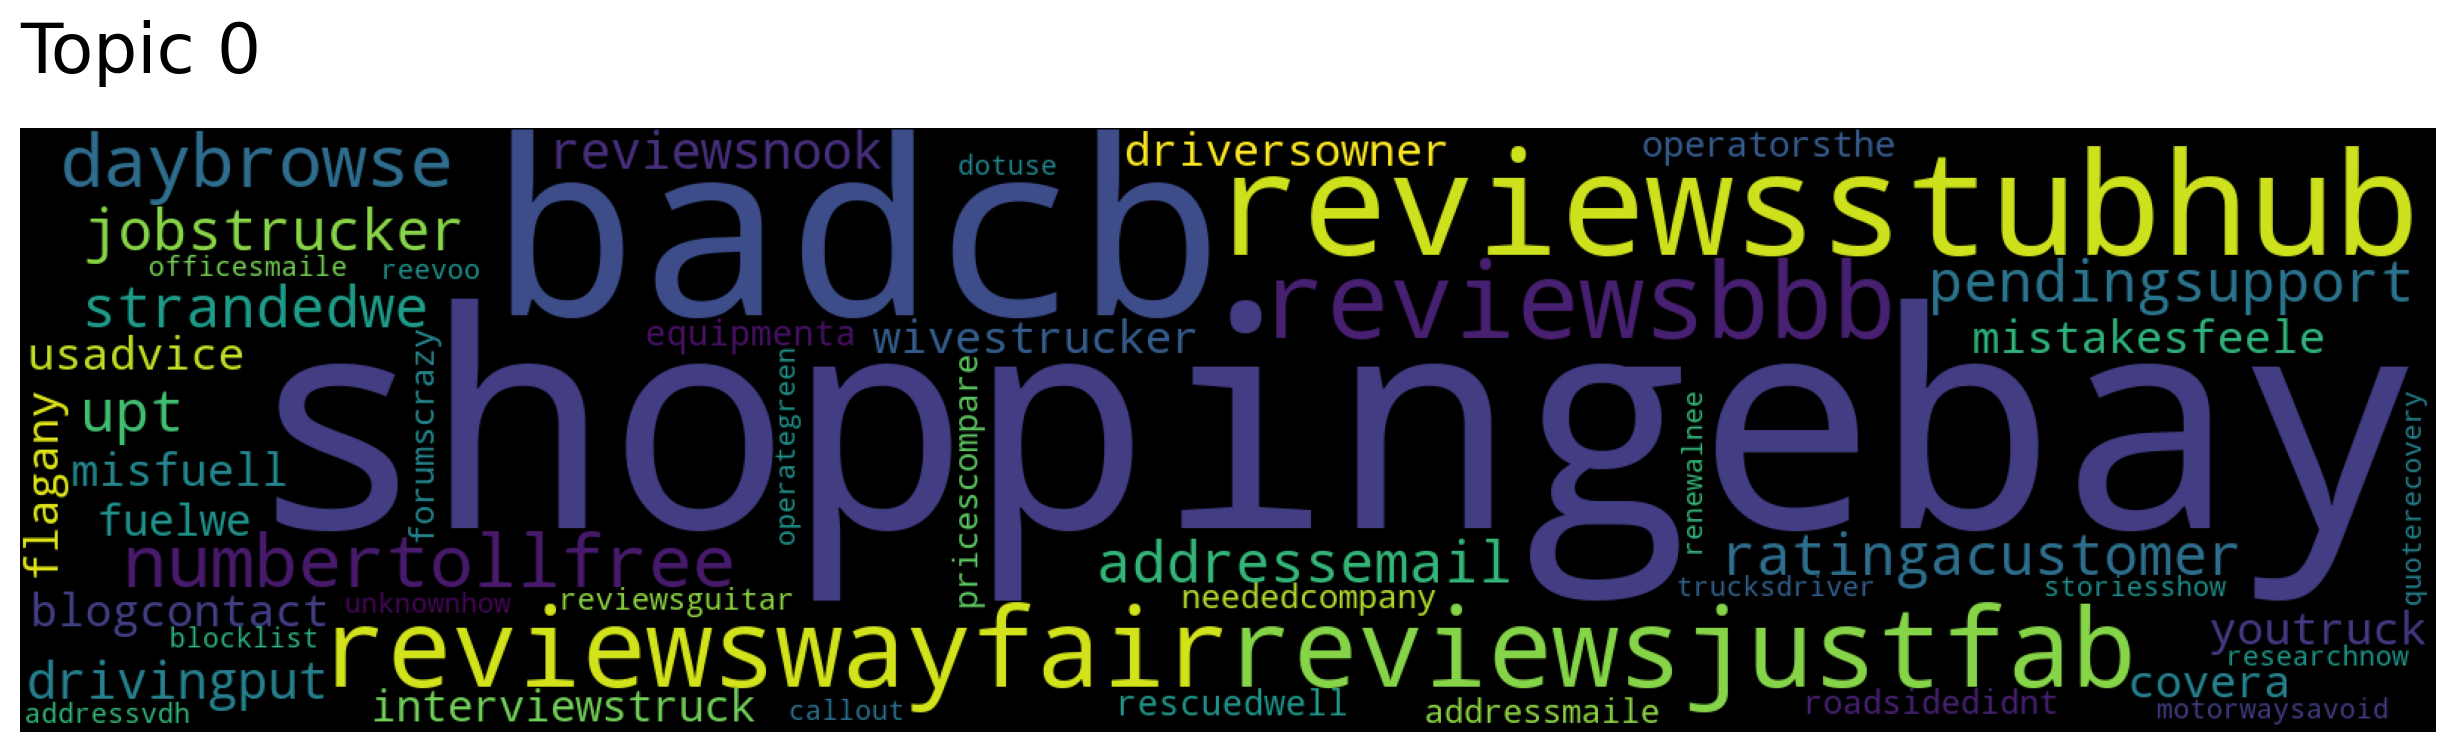

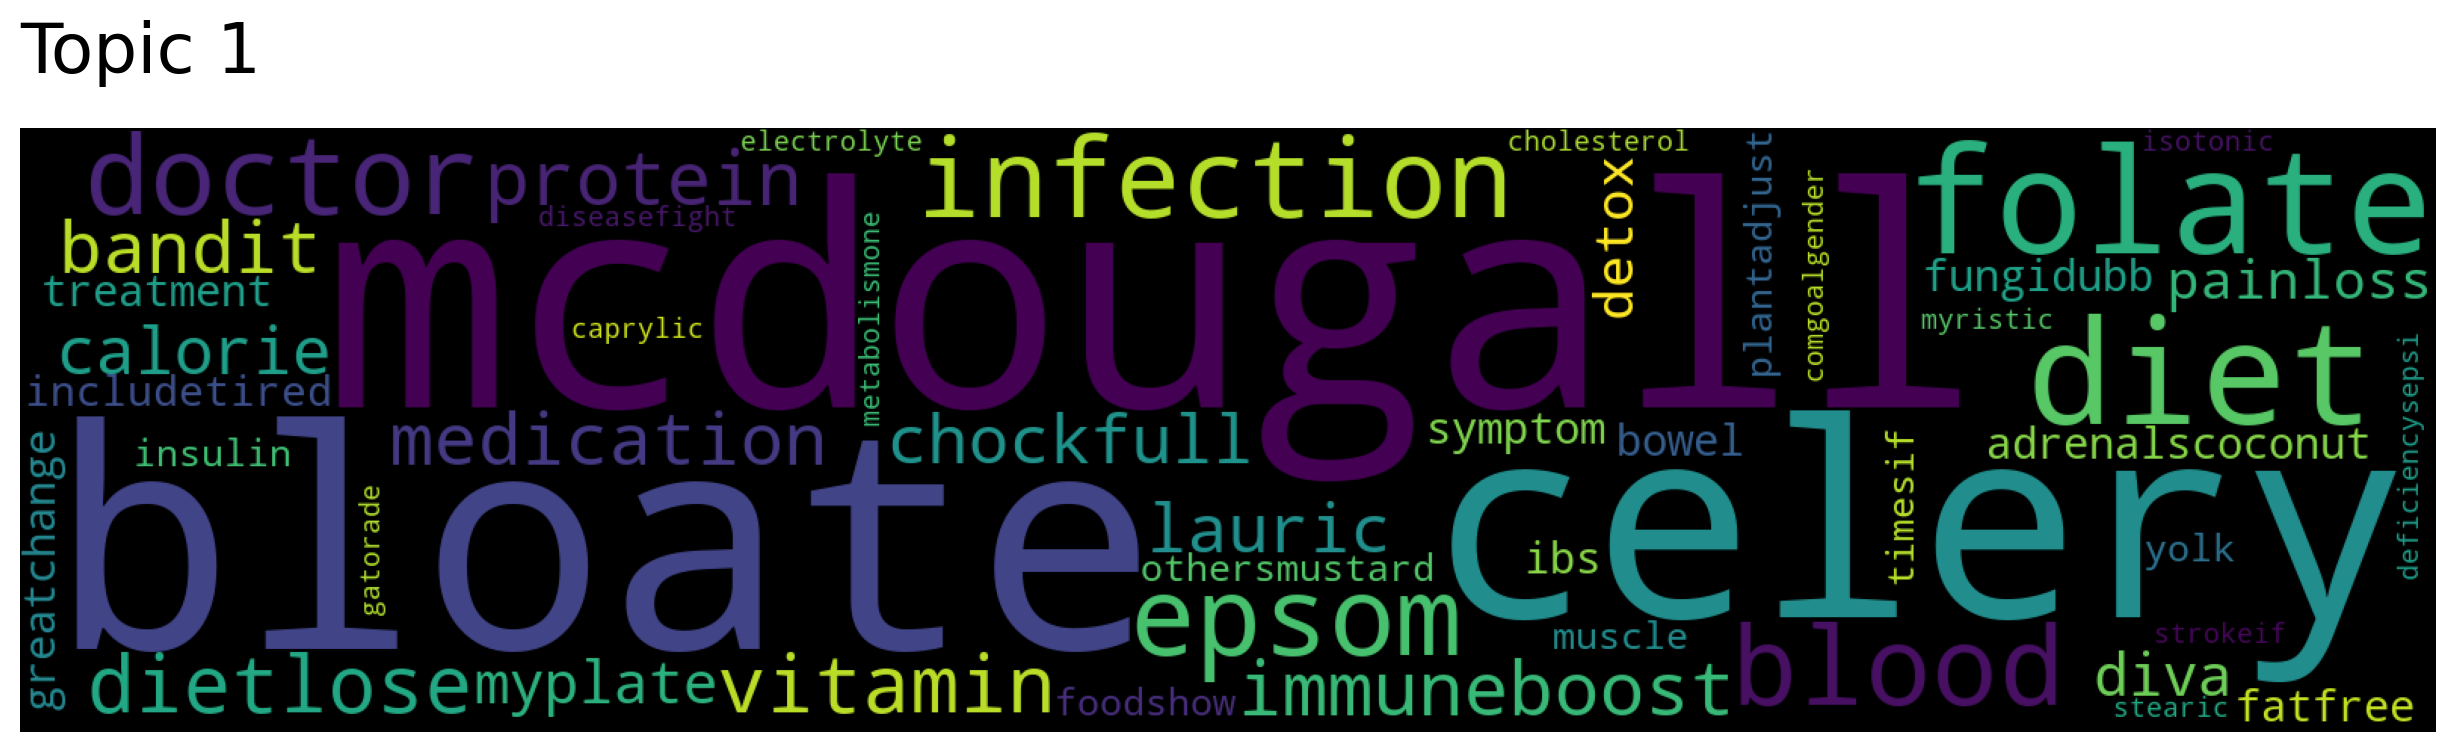

In [ ]:
for topic in topic_nums[0:4]:
    model.generate_topic_wordcloud(topic, background_color="black")

In [ ]:
pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 90 kB 4.0 MB/s 
     |████████████████████████████████| 88 kB 6.1 MB/s 
     |████████████████████████████████| 85 kB 3.9 MB/s 
     |████████████████████████████████| 662 kB 48.7 MB/s 
     |████████████████████████████████| 5.2 MB 47.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 5.8 MB 44.3 MB/s 
     |████████████████████████████████| 1.3 MB 45.1 MB/s 
     |████████████████████████████████| 182 kB 45.9 MB/s 
     |████████████████████████████████| 7.6 MB 45.7 MB/s 
     |████████████████████████████████| 1.1 MB 48.4 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp38-cp38-linux_x86_64.whl size=2700841 sha256=106352aac0e03e0ef8d37e1eccb27767d42cf732bd7fb81de45b325ac0704604
  Stored in directory: /root/.cache/

In [ ]:
import sys
import csv
import pandas as pd

from bertopic import BERTopic

csv.field_size_limit(sys.maxsize)

fr = open("/temp/fulldocs_subset_preprocessed.tsv", "r")
fw = open("/temp/fulldocs_subset_preprocessed_subset3000.tsv", "w")

input_file = csv.reader(fr, delimiter = "\t")
output_file = csv.writer(fw, delimiter = "\t")

index = 0
count = 0
for DocID, doc in input_file:
    #print("DocID : " + str(DocID))
    index = index+1  
    try:
      output_file.writerow([str(DocID), preprocess_with_krovetz_stemming(doc)])
      count = count+1
      if (count >= 3000):
        break
    except Exception as e:
      print(str(e))
print ('count : ' + str(index))     


count : 3000


In [ ]:
import sys
import csv
import pandas as pd

from bertopic import BERTopic

csv.field_size_limit(sys.maxsize)

fr = open("/temp/fulldocs_subset_preprocessed_subset3000.tsv", "r")
docs = []

input_file = csv.reader(fr, delimiter = "\t")

count = 0
max_count = 3000

for DocID, doc in input_file:
    count = count+1
    docs.append(doc)  
print('len(docs) : ' + str(len(docs)))

len(docs) : 3000


In [ ]:
model = BERTopic(language='english', calculate_probabilities=True, verbose=True)
topics, probs = model.fit_transform(docs)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Batches:   0%|          | 0/94 [00:00<?, ?it/s]

2022-12-04 03:02:32,435 - BERTopic - Transformed documents to Embeddings
2022-12-04 03:02:56,175 - BERTopic - Reduced dimensionality
2022-12-04 03:02:57,546 - BERTopic - Clustered reduced embeddings


In [ ]:
model.get_topic_info()

,Topic,Count,Name
0,-1,461,-1_use_enochian_tea_tutor
1,0,371,0_population_county_census_city
2,1,122,1_blood_pressure_opioid_drug
3,2,68,2_child_student_college_support
4,3,63,3_contribution_retirement_age_old
...,...,...,...
92,91,11,91_dna_polymerase_strand_enzyme
93,92,11,92_bangladesh_pangaon_port_inland
94,93,11,93_stretch_muscle_flexible_knee
95,94,11,94_ichiban_sapporo_package_ramen


In [ ]:
model.get_topic(0)

[('population', 0.03982992485950443),
 ('county', 0.032932854977194864),
 ('census', 0.025439539033534093),
 ('city', 0.0230223327067748),
 ('code', 0.01598847872384981),
 ('area', 0.014938154809739378),
 ('state', 0.014798746844540125),
 ('zip', 0.01466148817912153),
 ('mile', 0.014422523849706118),
 ('average', 0.013443907832225746)]

In [ ]:
model.get_topic(1)

[('blood', 0.042789810077930354),
 ('pressure', 0.031770056243147035),
 ('opioid', 0.029629488857845124),
 ('drug', 0.026914089493629834),
 ('medication', 0.02634498421682633),
 ('urine', 0.026199104669140775),
 ('pain', 0.02507411551174775),
 ('heart', 0.024032840701298307),
 ('sulfacetamide', 0.023847471319087647),
 ('morphine', 0.02303928165669967)]

In [ ]:
model.get_topic(2)

[('child', 0.06513106699857335),
 ('student', 0.0528829279824546),
 ('college', 0.0441248347141574),
 ('support', 0.042003529784061105),
 ('university', 0.03741410088627806),
 ('parent', 0.0370079258892933),
 ('school', 0.03699017365844431),
 ('tax', 0.03416116235934767),
 ('claim', 0.03317412532042065),
 ('credit', 0.024509423330769928)]

In [ ]:
model.get_topic(3)

[('law', 0.040026159807666356),
 ('service', 0.036658415719287886),
 ('trust', 0.03139273460320002),
 ('act', 0.026769813677816705),
 ('state', 0.02592911734999806),
 ('individual', 0.025349173206390952),
 ('payment', 0.02506279752234588),
 ('employee', 0.024657134325478797),
 ('position', 0.02443379991345756),
 ('signature', 0.023327437843171664)]

In [ ]:
model.get_topic(4)

[('average', 0.1190266677061055),
 ('current', 0.096285565150998),
 ('kilowatt', 0.08955710176609824),
 ('use', 0.07848291323270981),
 ('month', 0.07457192114704689),
 ('air', 0.06683614879552018),
 ('house', 0.06262181104452005),
 ('lake', 0.05877872411147992),
 ('arc', 0.05760319130496199),
 ('bass', 0.056493302376117965)]

In [ ]:
pip install rank_bm25

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install krovetzstemmer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 112 kB 5.4 MB/s 
  Created wheel for krovetzstemmer: filename=KrovetzStemmer-0.8-cp37-cp37m-linux_x86_64.whl size=352773 sha256=8c289acfc4d4e52d98776e1fb153f0d6af6a6816fdba85a95db3365ba78c7876
  Stored in directory: /root/.cache/pip/wheels/ff/ec/c5/fb77700de389be032ea95c7edc686790e0d817f2a6b4340054
Successfully built krovetzstemmer


In [ ]:
pip install -U sentence-transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from nltk import pos_tag
text ="what is monological illusion"
print ("Original Query : " + text)
#text ="causes for left shoulder and bicep"
text.lower()
tokens = nltk.word_tokenize(text)
tokens_tag = pos_tag(tokens)
#print("After Token:",tokens_tag)

from nltk.corpus import wordnet

def synonyms_as_per_pos_tag(synonyms, token_tag):
  #print("token_tag : " + str(token_tag[1]))
  token_tag = token_tag[1].split()[0]
  res = list()
  if (token_tag == 'NN' or token_tag == 'NNS'):
    res = list(filter(lambda l : l.pos() == wordnet.NOUN, synonyms)) 
  elif (token_tag == 'VB' or token_tag == 'VBG' or token_tag == 'VBD' or token_tag == 'VBN' or token_tag == 'VBP' or token_tag == 'VBZ'):
    res = list(filter(lambda l : l.pos() == wordnet.VERB, synonyms))   
  elif (token_tag == 'RB' or token_tag == 'RBR' or token_tag == 'RBS'):
    res = list(filter(lambda l : l.pos() == wordnet.ADV, synonyms)) 
  elif (token_tag == 'JJ' or token_tag == 'JJR' or token_tag == 'JJS'):
    res = list(filter(lambda l : l.pos() == wordnet.ADJ, synonyms))   

  return res

def permutations_util(tokens, syn_list, length, res, index, paraphrase):
  if(index >= length):
    res.append(paraphrase)
    #print('Inside paraphrase : ' + paraphrase)
    return
  for syn_words in syn_list[tokens[index]]:   
    next_paraphrase = paraphrase
    next_paraphrase = next_paraphrase + syn_words
    next_paraphrase = next_paraphrase + " " 
    permutations_util(tokens, syn_list, length, res, index+1, next_paraphrase)

def permutations(tokens, syn_list):
  res = list()
  paraphrase = ""
  permutations_util(tokens, syn_list, len(tokens), res, 0, paraphrase)
  return res

index = 0
syn_list = dict()
for token in tokens:
  if (syn_list.get(token) == None):
    syn_list[token] = set()
    syn_list[token].add(token)
  synonyms = wordnet.synsets(token)
  synonyms_with_pos_tag = synonyms_as_per_pos_tag(synonyms, tokens_tag[index])
  for wd in synonyms_with_pos_tag:
    if (wd.name().split('.')[0] != token):
      syn_list[token].add(wd.name().split('.')[0])
  index = index+1

#for key in syn_list.keys():
#  print(syn_list[key])

#generate permutations
all_pos_tag_syn_paraphrases = permutations(tokens, syn_list)
print('len(all_paraphrases)' + str(len(all_pos_tag_syn_paraphrases)))
for paraphrase in all_pos_tag_syn_paraphrases:
  print('paraphrase : ' + paraphrase)

Original Query : what is monological illusion
len(all_paraphrases)21
paraphrase : what embody monological illusion 
paraphrase : what embody monological magic_trick 
paraphrase : what embody monological delusion 
paraphrase : what cost monological illusion 
paraphrase : what cost monological magic_trick 
paraphrase : what cost monological delusion 
paraphrase : what is monological illusion 
paraphrase : what is monological magic_trick 
paraphrase : what is monological delusion 
paraphrase : what constitute monological illusion 
paraphrase : what constitute monological magic_trick 
paraphrase : what constitute monological delusion 
paraphrase : what exist monological illusion 
paraphrase : what exist monological magic_trick 
paraphrase : what exist monological delusion 
paraphrase : what be monological illusion 
paraphrase : what be monological magic_trick 
paraphrase : what be monological delusion 
paraphrase : what equal monological illusion 
paraphrase : what equal monological magic_

In [ ]:
from bertopic import BERTopic
BERTModel_20K_80Topics = BERTopic.load("/content/drive/MyDrive/collectionandqueries/20KDocs/qrels_BERT_model_20K_80Topics")

In [1]:
from nltk import pos_tag
text ="what is monological illusion"
print ("Original Query : " + text)
#text ="causes for left shoulder and bicep"
text.lower()
tokens = nltk.word_tokenize(text)
tokens_tag = pos_tag(tokens)
#print("After Token:",tokens_tag)

from nltk.corpus import wordnet

def synonyms_as_per_pos_tag(synonyms, token_tag):
  #print("token_tag : " + str(token_tag[1]))
  token_tag = token_tag[1].split()[0]
  res = list()
  if (token_tag == 'NN' or token_tag == 'NNS'):
    res = list(filter(lambda l : l.pos() == wordnet.NOUN, synonyms)) 
  elif (token_tag == 'VB' or token_tag == 'VBG' or token_tag == 'VBD' or token_tag == 'VBN' or token_tag == 'VBP' or token_tag == 'VBZ'):
    res = list(filter(lambda l : l.pos() == wordnet.VERB, synonyms))   
  elif (token_tag == 'RB' or token_tag == 'RBR' or token_tag == 'RBS'):
    res = list(filter(lambda l : l.pos() == wordnet.ADV, synonyms)) 
  elif (token_tag == 'JJ' or token_tag == 'JJR' or token_tag == 'JJS'):
    res = list(filter(lambda l : l.pos() == wordnet.ADJ, synonyms))   

  return res

def permutations_util(tokens, syn_list, length, res, index, paraphrase):
  if(index >= length):
    res.append(paraphrase)
    #print('Inside paraphrase : ' + paraphrase)
    return
  for syn_words in syn_list[tokens[index]]:   
    next_paraphrase = paraphrase
    next_paraphrase = next_paraphrase + syn_words
    next_paraphrase = next_paraphrase + " " 
    permutations_util(tokens, syn_list, length, res, index+1, next_paraphrase)

def permutations(tokens, syn_list):
  res = list()
  paraphrase = ""
  permutations_util(tokens, syn_list, len(tokens), res, 0, paraphrase)
  return res

index = 0
syn_list = dict()
for token in tokens:
  if (syn_list.get(token) == None):
    syn_list[token] = set()
    syn_list[token].add(token)
  synonyms = wordnet.synsets(token)
  synonyms_with_pos_tag = synonyms_as_per_pos_tag(synonyms, tokens_tag[index])
  for wd in synonyms_with_pos_tag:
    if (wd.name().split('.')[0] != token):
      syn_list[token].add(wd.name().split('.')[0])
  index = index+1

#for key in syn_list.keys():
#  print(syn_list[key])

#generate permutations
all_pos_tag_syn_paraphrases = permutations(tokens, syn_list)
print('len(all_paraphrases)' + str(len(all_pos_tag_syn_paraphrases)))
for paraphrase in all_pos_tag_syn_paraphrases:
  print('paraphrase : ' + paraphrase)

Original Query : what is monological illusion


NameError: ignored

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

model = SentenceTransformer('paraphrase-MiniLM-L3-v2')
sentences = ["who sings the rodeo clown song?",
    "The fish dreamed of escaping the fishbowl and into the toilet where he saw his friend go.",
    "The person box was packed with jelly many dozens of months later.",
    "who sings the rodeo clown song.",
    "who sings the rodeo classical song"]
#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)
print(embeddings.shape)
cosine_similarity([embeddings[0]], embeddings[1:])


(5, 384)


array([[-0.11134604,  0.04078584, -0.09823754, -0.06052331]],
      dtype=float32)

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

model = SentenceTransformer('paraphrase-MiniLM-L3-v2')
sentences = ["Three years later, the coffin was still full of Jello.",
    "The fish dreamed of escaping the fishbowl and into the toilet where he saw his friend go.",
    "The person box was packed with jelly many dozens of months later.",
    "He found a leprechaun in his walnut shell."]
#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

#Print the embeddings
"""
for sentence, embedding in zip(sentences, embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")
"""
print(embeddings.shape)
cosine_similarity([embeddings[0]], embeddings[1:])



(4, 384)


array([[0.1418316 , 0.30027795, 0.12228075]], dtype=float32)

In [ ]:
import sys
import csv
import pandas as pd

from bertopic import BERTopic

csv.field_size_limit(sys.maxsize)

fr = open("/content/drive/MyDrive/collectionandqueries/fulldocs_subset_preprocessed.tsv", "r")
full_doc_ids = []
full_docs = []

input_file = csv.reader(fr, delimiter = "\t")

for DocID, Doc in input_file:
    print('DocID : ' + str(DocID))
    full_doc_ids.append(DocID)
    full_docs.append(Doc)  
print('len(full_doc_ids) : ' + str(len(full_doc_ids)))
print('len(full_docs) : ' + str(len(full_docs)))